In [18]:
datos = "calleToledo1_2021.csv"
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(datos,sep=";",parse_dates=True)
df.index = pd.to_datetime(df["fecha"])
df

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
fecha,,,,,,,,,
2021-01-01 00:00:00,4708,2021-01-01 00:00:00,URB,87,1.0,7,0.0,N,15
2021-01-01 00:15:00,4708,2021-01-01 00:15:00,URB,65,2.0,6,0.0,N,12
2021-01-01 00:30:00,4708,2021-01-01 00:30:00,URB,104,3.0,9,0.0,N,15
2021-01-01 00:45:00,4708,2021-01-01 00:45:00,URB,124,2.0,11,0.0,N,15
2021-01-01 01:00:00,4708,2021-01-01 01:00:00,URB,148,4.0,13,0.0,N,15
...,...,...,...,...,...,...,...,...,...
2021-12-31 22:45:00,4708,2021-12-31 22:45:00,URB,148,4.0,14,0.0,N,15
2021-12-31 23:00:00,4708,2021-12-31 23:00:00,URB,80,2.0,7,0.0,N,15
2021-12-31 23:15:00,4708,2021-12-31 23:15:00,URB,116,3.0,10,0.0,N,15


In [19]:
import math
df2=df[['fecha', 'intensidad', 'ocupacion']]
df2.describe()

,intensidad,ocupacion
count,34645.000000,34645.000000
mean,190.174109,9.398759
std,92.405175,13.520503
min,0.000000,0.000000
25%,115.000000,3.000000
50%,207.000000,6.000000
75%,260.000000,9.000000
max,1732.000000,90.000000


C:\Users\jonay\AppData\Local\Temp\ipykernel_11848\2157894068.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = df.intensidad.mad()


207.0 77.38518125278723 190.17410881801126 240


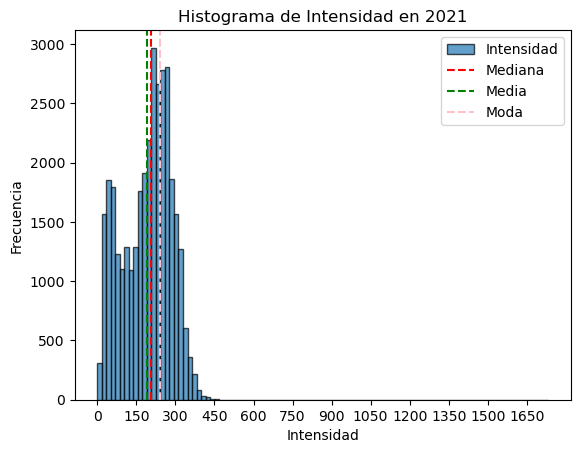

In [20]:
mediana = df.intensidad.median()
mad = df.intensidad.mad()
media= df.intensidad.mean()
moda = df.intensidad.mode()
print(mediana,mad,media,moda[0])

plt.hist(df.intensidad, bins=100, edgecolor='black', alpha=0.7, label='Intensidad')

# Agregar títulos y etiquetas
plt.title('Histograma de Intensidad en 2021')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.axvline(mediana, color='red', linestyle='--', label='Mediana')
plt.axvline(media, color='green', linestyle='--', label='Media')
plt.axvline(moda[0], color='pink', linestyle='--', label='Moda')

# Ajustar las divisiones en el eje x
plt.xticks(range(df.intensidad.min(), df.intensidad.max(), 150))

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

<AxesSubplot:>

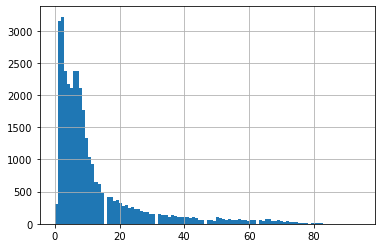

In [54]:
df.ocupacion.hist(bins = 100)

C:\Users\jonay\AppData\Local\Temp\ipykernel_24020\1189846398.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = df.ocupacion.mad()


6.0 7.361650100442521 9.398758839659402 6.0


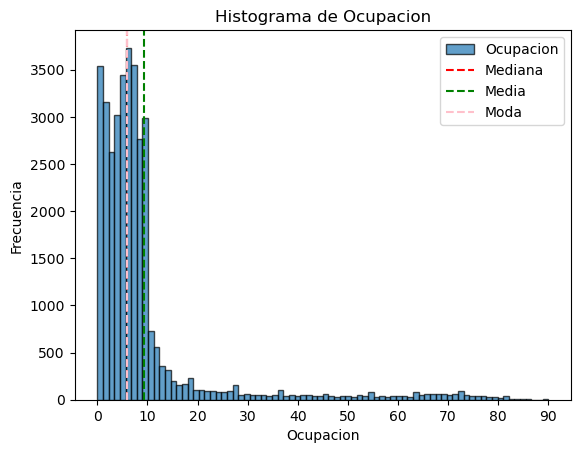

In [9]:
mediana = df.ocupacion.median()
mad = df.ocupacion.mad()
media= df.ocupacion.mean()
moda = df.ocupacion.mode()
print(mediana,mad,media,moda[0])

plt.hist(df.ocupacion, bins=80, edgecolor='black', alpha=0.7, label='Ocupacion')

# Agregar títulos y etiquetas
plt.title('Histograma de Ocupacion')
plt.xlabel('Ocupacion')
plt.ylabel('Frecuencia')

plt.axvline(mediana, color='red', linestyle='--', label='Mediana')
plt.axvline(media, color='green', linestyle='--', label='Media')
plt.axvline(moda[0], color='pink', linestyle='--', label='Moda')

# Ajustar las divisiones en el eje x
plt.xticks(range(0, 100, 10))

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

## Outliers

Text(0.5, 1.0, 'Diagrama de caja para valores de Intensidad')

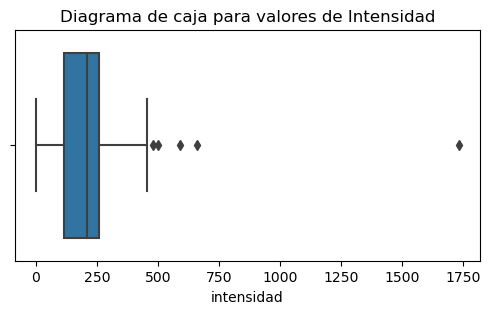

In [23]:
import seaborn as sns
plt.figure(figsize=(6, 3))
ax = sns.boxplot(x=df["intensidad"])
plt.title('Diagrama de caja para valores de Intensidad')

In [12]:
df[df.intensidad>1700]

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
fecha,,,,,,,,,
2021-11-03 11:45:00,4708,2021-11-03 11:45:00,URB,1732,23.0,37,0.0,N,15


In [21]:
df["hora"] = df.index.hour
df["dia"] = df.index.day
df["mes"] = df.index.month

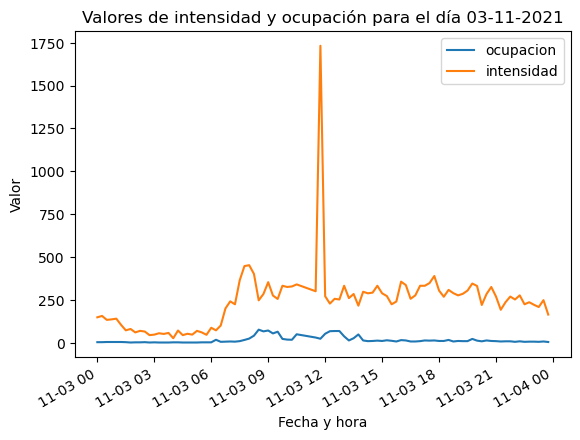

In [7]:
dfout = df[(df.dia==3) & (df.mes==11)]
dfout[["ocupacion","intensidad"]].plot()

# Agregar títulos y etiquetas
plt.title('Valores de intensidad y ocupación para el día 03-11-2021')
plt.xlabel('Fecha y hora')
plt.ylabel('Valor')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

In [51]:
df2 = df[df.intensidad>475]
df2 = df2[['intensidad', 'ocupacion']]
df2

,intensidad,ocupacion
fecha,,
2021-02-26 17:00:00,660,15.0
2021-05-29 12:15:00,500,26.0
2021-06-02 12:45:00,591,43.0
2021-11-03 11:45:00,1732,23.0
2021-11-18 08:00:00,480,28.0


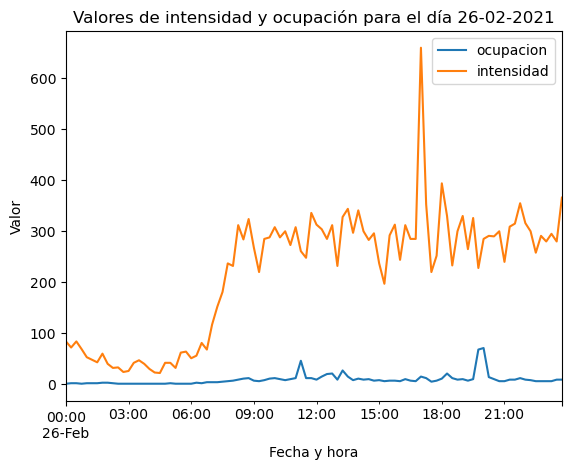

In [21]:
dfout = df[(df.dia==26) & (df.mes==2)]
dfout[["ocupacion","intensidad"]].plot()

# Agregar títulos y etiquetas
plt.title('Valores de intensidad y ocupación para el día 26-02-2021')
plt.xlabel('Fecha y hora')
plt.ylabel('Valor')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

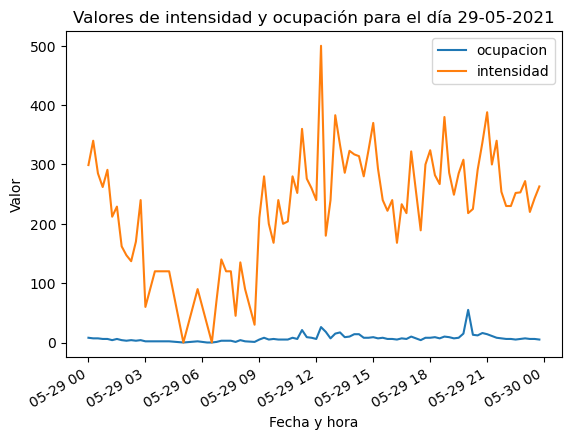

In [23]:
dfout = df[(df.dia==29) & (df.mes==5)]
dfout[["ocupacion","intensidad"]].plot()

# Agregar títulos y etiquetas
plt.title('Valores de intensidad y ocupación para el día 29-05-2021')
plt.xlabel('Fecha y hora')
plt.ylabel('Valor')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

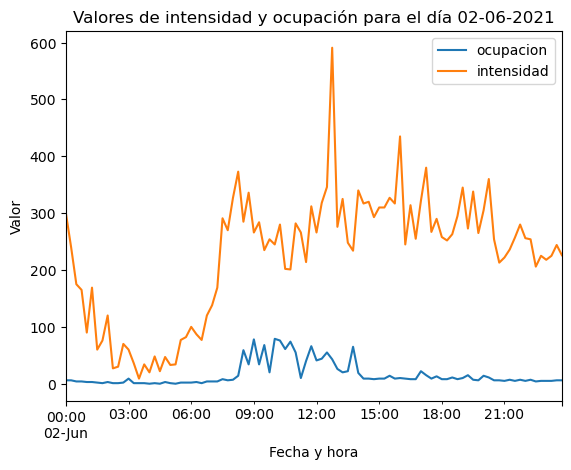

In [25]:
dfout = df[(df.dia==2) & (df.mes==6)]
dfout[["ocupacion","intensidad"]].plot()

# Agregar títulos y etiquetas
plt.title('Valores de intensidad y ocupación para el día 02-06-2021')
plt.xlabel('Fecha y hora')
plt.ylabel('Valor')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

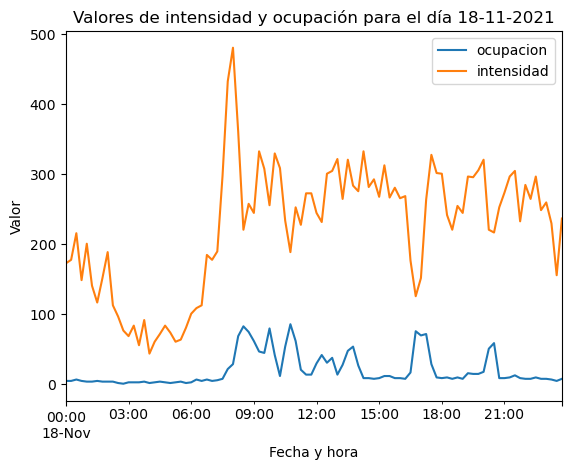

In [26]:
dfout = df[(df.dia==18) & (df.mes==11)]
dfout[["ocupacion","intensidad"]].plot()

# Agregar títulos y etiquetas
plt.title('Valores de intensidad y ocupación para el día 18-11-2021')
plt.xlabel('Fecha y hora')
plt.ylabel('Valor')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

Text(0.5, 1.0, 'Diagrama de caja para valores de ocupación')

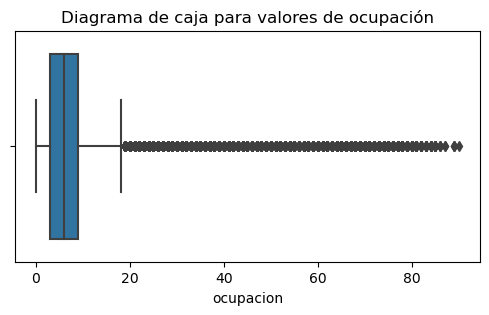

In [22]:
plt.figure(figsize=(6, 3))
ax = sns.boxplot(x=df["ocupacion"])
plt.title('Diagrama de caja para valores de ocupación')

In [44]:
df[df.ocupacion== df.ocupacion.max()]

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,hora,dia,mes
fecha,,,,,,,,,,,,
2021-06-16 21:30:00,4708,2021-06-16 21:30:00,URB,67,90.0,91,0.0,N,15,21,16,6


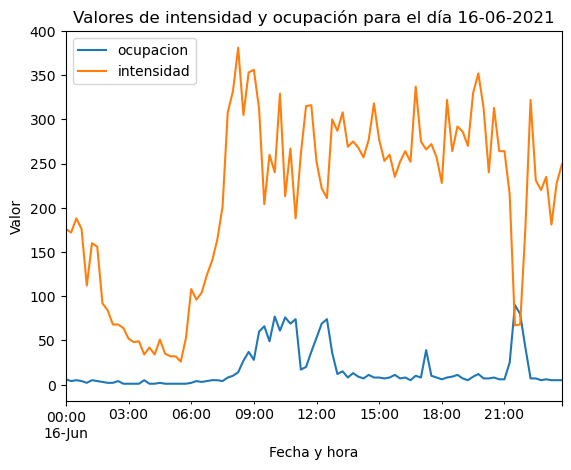

In [32]:
dfout = df[(df.dia==16) & (df.mes==6)]
dfout[["ocupacion","intensidad"]].plot()

# Agregar títulos y etiquetas
plt.title('Valores de intensidad y ocupación para el día 16-06-2021')
plt.xlabel('Fecha y hora')
plt.ylabel('Valor')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

In [65]:
dfout.tail(50)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,hora,dia,mes
fecha,,,,,,,,,,,,
2021-06-16 11:30:00,4709,2021-06-16 11:30:00,URB,332,14.0,33,0.0,N,15,11,16,6
2021-06-16 11:45:00,4709,2021-06-16 11:45:00,URB,337,47.0,60,0.0,N,15,11,16,6
2021-06-16 12:00:00,4709,2021-06-16 12:00:00,URB,300,48.0,59,0.0,N,15,12,16,6
2021-06-16 12:15:00,4709,2021-06-16 12:15:00,URB,277,33.0,44,0.0,N,13,12,16,6
2021-06-16 12:30:00,4709,2021-06-16 12:30:00,URB,340,17.0,36,0.0,N,15,12,16,6
2021-06-16 12:45:00,4709,2021-06-16 12:45:00,URB,280,38.0,49,0.0,N,12,12,16,6
2021-06-16 13:00:00,4709,2021-06-16 13:00:00,URB,339,43.0,56,0.0,N,14,13,16,6
2021-06-16 13:15:00,4709,2021-06-16 13:15:00,URB,356,25.0,42,0.0,N,14,13,16,6
2021-06-16 13:30:00,4709,2021-06-16 13:30:00,URB,355,14.0,33,0.0,N,12,13,16,6


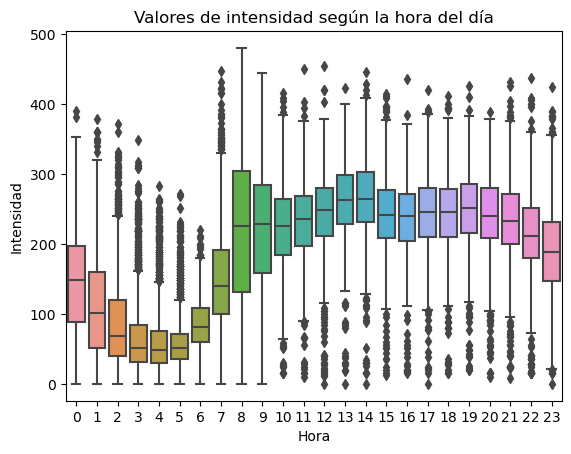

In [24]:
df = df[df.intensidad<500]
ax = sns.boxplot(x="hora",y="intensidad",data=df)

# Agregar títulos y etiquetas
plt.title('Valores de intensidad según la hora del día')
plt.xlabel('Hora')
plt.ylabel('Intensidad')


# Mostrar el histograma
plt.show()

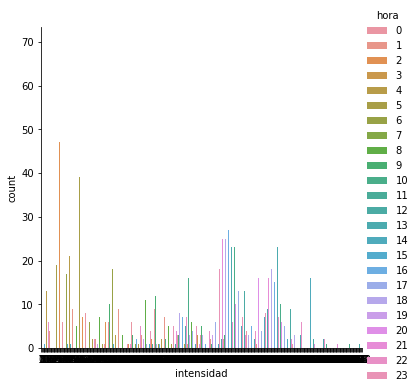

In [67]:
sns.catplot(data=df,x="intensidad",kind="count",hue="hora")

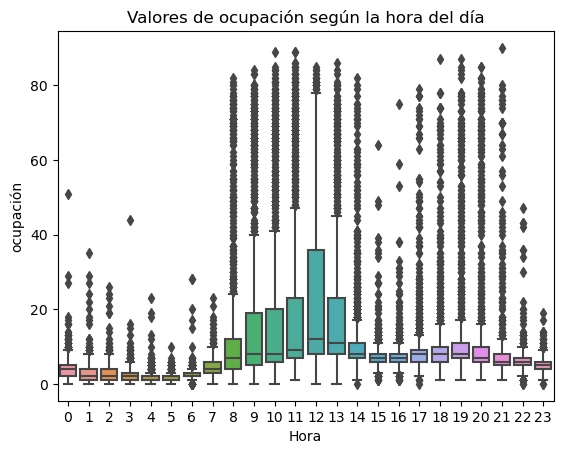

In [17]:
ax = sns.boxplot(x="hora",y="ocupacion",data=df)
# Agregar títulos y etiquetas
plt.title('Valores de ocupación según la hora del día')
plt.xlabel('Hora')
plt.ylabel('ocupación')


# Mostrar el histograma
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = df.copy()
df2["intensidad"] = scaler.fit_transform(df2[["intensidad"]])
scaler = MinMaxScaler()
df2["ocupacion"] = scaler.fit_transform(df2[["ocupacion"]])
df2.describe()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion,hora,dia,mes
count,34641.0,34641.000000,34641.000000,34641.000000,34641.0,34641.000000,34641.000000,34641.000000,34641.000000
mean,4708.0,0.396032,0.104408,20.343812,0.0,14.118876,11.530470,15.736930,6.558587
std,0.0,0.191591,0.150217,14.678171,0.0,2.020910,6.926812,8.805172,3.434900
min,4708.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000
25%,4708.0,0.239583,0.033333,10.000000,0.0,14.000000,6.000000,8.000000,4.000000
50%,4708.0,0.431250,0.066667,19.000000,0.0,15.000000,12.000000,16.000000,7.000000
75%,4708.0,0.541667,0.100000,25.000000,0.0,15.000000,18.000000,23.000000,10.000000
max,4708.0,1.000000,1.000000,92.000000,0.0,15.000000,23.000000,31.000000,12.000000


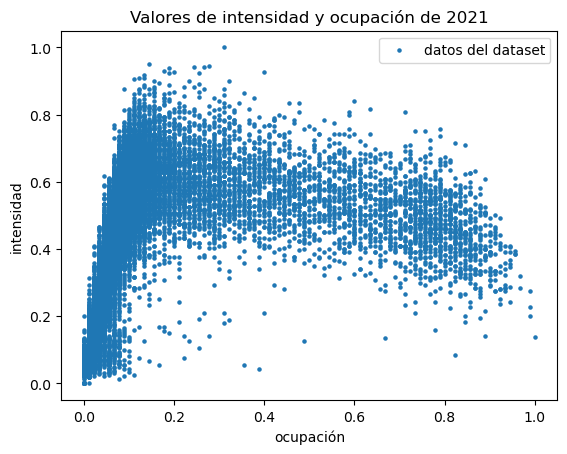

In [27]:
#df2[["intensidad","ocupacion"]].plot()

import matplotlib.pyplot as plt

y = df2.intensidad
x = df2.ocupacion

plt.scatter(x,y,s=5, label="datos del dataset")

# Agregar títulos y etiquetas
plt.title('Valores de intensidad y ocupación de 2021')
plt.xlabel('ocupación')
plt.ylabel('intensidad')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

In [29]:
import math
import numpy as np
def  distancia(row):
    print(row)
    x = row[1]["ocupacion"]
    y = row[1]["intensidad"]
    # distancia a (1,0)
    d = math.sqrt(y*y+(x-1)*(x-1))
    return d

df2["atasco"] = (np.sqrt(2)-np.sqrt((df2["ocupacion"]-1)*(df2["ocupacion"]-1)+(df2["intensidad"]*df2["intensidad"])))/np.sqrt(2)
df2.describe()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion,hora,dia,mes,atasco
count,34641.0,34641.000000,34641.000000,34641.000000,34641.0,34641.000000,34641.000000,34641.000000,34641.000000,34641.000000
mean,4708.0,0.396032,0.104408,20.343812,0.0,14.118876,11.530470,15.736930,6.558587,0.290750
std,0.0,0.191591,0.150217,14.678171,0.0,2.020910,6.926812,8.805172,3.434900,0.077860
min,4708.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.095988
25%,4708.0,0.239583,0.033333,10.000000,0.0,14.000000,6.000000,8.000000,4.000000,0.255387
50%,4708.0,0.431250,0.066667,19.000000,0.0,15.000000,12.000000,16.000000,7.000000,0.282752
75%,4708.0,0.541667,0.100000,25.000000,0.0,15.000000,18.000000,23.000000,10.000000,0.299601
max,4708.0,1.000000,1.000000,92.000000,0.0,15.000000,23.000000,31.000000,12.000000,0.901300


In [72]:
from os import listdir
from os.path import isfile, join
path = "C:/Users/jonay/Desktop/Master_IoT/TFM"
df2.to_csv(join(path,"Toledo2.csv"),index=False)

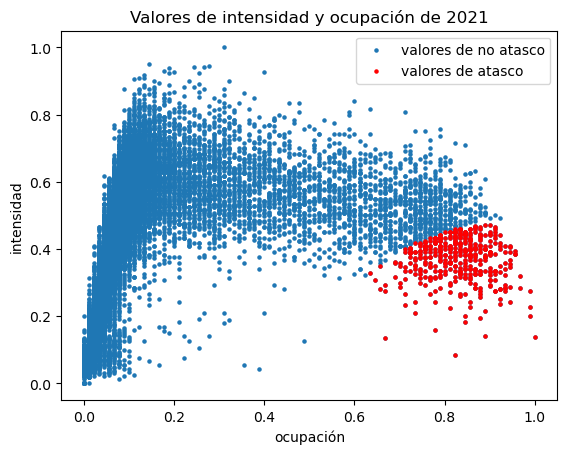

In [37]:
y = df2.intensidad
x = df2.ocupacion

plt.scatter(x,y,s=5,label="valores de no atasco")
df3 = df2[df2.atasco>0.65]

y = df3.intensidad
x = df3.ocupacion

plt.scatter(x,y,s=5,color="red", label="valores de atasco")

# Agregar títulos y etiquetas
plt.title('Valores de intensidad y ocupación de 2021')
plt.xlabel('ocupación')
plt.ylabel('intensidad')

# Agregar leyenda
plt.legend()

# Mostrar el histograma
plt.show()

In [74]:
df3.sort_values(by=["atasco"],ascending=False)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion,hora,dia,mes,atasco
fecha,,,,,,,,,,,,,
2021-12-11 20:00:00,4709,2021-12-11 20:00:00,URB,0.219512,0.957447,92,0.0,N,15,20,11,12,0.841892
2021-12-05 13:15:00,4709,2021-12-05 13:15:00,URB,0.243902,0.882979,84,0.0,N,14,13,5,12,0.808712
2021-03-04 11:45:00,4709,2021-03-04 11:45:00,URB,0.304878,1.000000,95,0.0,N,2,11,4,3,0.784419
2021-11-27 21:00:00,4709,2021-11-27 21:00:00,URB,0.286585,0.872340,84,0.0,N,14,21,27,11,0.778158
2021-11-18 12:15:00,4709,2021-11-18 12:15:00,URB,0.308943,0.861702,82,0.0,N,15,12,18,11,0.760655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08 12:00:00,4709,2021-12-08 12:00:00,URB,0.455285,0.670213,69,0.0,N,15,12,8,12,0.602480
2021-10-29 11:15:00,4709,2021-10-29 11:15:00,URB,0.536585,0.829787,81,0.0,N,15,11,29,10,0.601945
2021-02-05 20:45:00,4709,2021-02-05 20:45:00,URB,0.471545,0.691489,72,0.0,N,15,20,5,2,0.601545


<AxesSubplot:xlabel='fecha'>

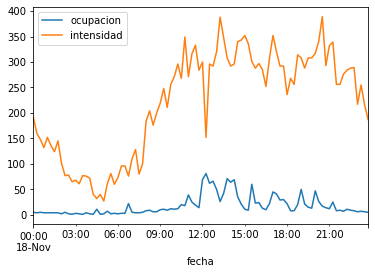

In [75]:
dfout = df[(df.dia==18) & (df.mes==11)]
dfout[["ocupacion","intensidad"]].plot()

In [76]:
df3.shape, df2.shape

((135, 13), (34608, 13))

In [15]:
import numpy as np
x=1
y=1
d = (np.sqrt(2)-np.sqrt((x-1)*(x-1)+(y*y)))/np.sqrt(2)
d

0.29289321881345254